<a href="https://colab.research.google.com/github/calypsso01/-Solucion-Proyecto-C116/blob/main/PROC_126_CNN_VANNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de datos

**Estructura del directorio del conjunto de datos de la imagen**:

**Nota: los nombres de los directorios y subdirectorios que se muestran aquí son solo para propósitos de explicación que pueden diferir del código.

Supongamos que tenemos un directorio principal (carpeta) de imágenes, entonces podemos subdividirlo en subdirectorios (subcarpetas) de imágenes de "entrenamiento" (*training*), "validación" (*validation*) y "prueba" (*testing*).

Entonces los directorios de "entrenamiento" contienen subdirectorios(subcarpetas) llamados "infectados" (*infected*) y "no infectados" (*uninfected*), que contienen las imágenes correspondientes en los respectivos subdirectorios.

Del mismo modo, los directorios de "validación" y "prueba" también contienen subdirectorios (subcarpetas) denominados "infectado" y "no infectado" que contienen las imágenes correspondientes en los respectivos subdirectorios.


**Entrenamiento**: las imágenes de este directorio se utilizarán para el entrenamiento de los datos.

**Validación**: las imágenes de este directorio se utilizarán para validar el entrenamiento del modelo. El conjunto de datos de validación nos permite ver lo bien que los datos generalizan la clasificación.

**Prueba**: las imágenes de este directorio se utilizarán para probar lo bien que se ha entrenado el modelo.


<img src="https://drive.google.com/uc?id=1-AMSvB19tME043-_oC9BQJIydiVCuukb" width= 600>



In [ ]:
!git clone https://github.com/procodingclass/PRO-M3-Pneumothorax-Image-Dataset

Cloning into 'PRO-M3-Pneumothorax-Image-Dataset'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (297/297), done.
remote: Total 313 (delta 3), reused 300 (delta 3), pack-reused 13
Receiving objects: 100% (313/313), 118.60 MiB | 18.77 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (602/602), done.


## Visualizar los datos

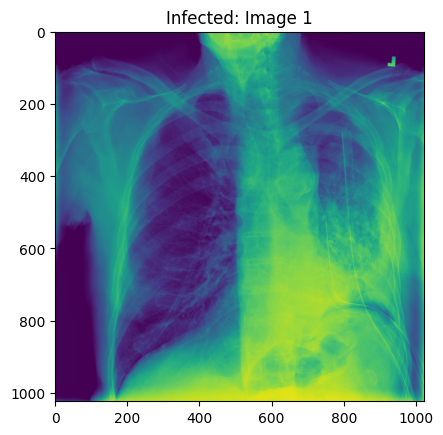

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

training_infected_image = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset/infected/training_image_1.png"

# carga los pixeles de la imagen
image = imread(training_infected_image)

pyplot.title("Infected: Image 1")

# traza los pixeles sin procesar
pyplot.imshow(image)

# muestra la imagen
pyplot.show()


## Preprocesamiento de imagen

1. Convertir cada imagen en una matriz.
2. Mapear las etiquetas de cada imagen.
3. Aumentar cada imagen.

### Preprocesamiento de imagen: mapear cada imagen con etiquetas

<center><b>Mapear cada imagen con etiquetas</b><br><img src="https://drive.google.com/uc?id=1_b1xd8UxuouE3zoTwzRxq3zPxzsnTF0U" width= 1000>

### Preprocesamiento de imagen: data augmentation

Algunas técnicas de data augmentation son:

*   Rotación de imagen.
*   Desplazamiento de la altura y ancho de la imagen.
*   Giro horizontal y vertical de la imagen.
*   Cambio de tamaño de la imagen.
*   Ampliación (zoom) de la imagen.


<img src="https://drive.google.com/uc?id=1WiQYLCyavp0KlCXoHYIRT5KrjNLLR-Um" width= 400>











## Preprocesamiento de la imagen

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rotación aleatoria con Image Data Generator
training_data_generator = ImageDataGenerator(rotation_range=90, fill_mode='nearest')

# Directorio de la imagen
training_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset"

# Generar imágenes rotadas de forma aleatoria
training_augmented_images = training_data_generator.flow_from_directory(training_image_directory,target_size=(180,180))

Found 200 images belonging to 2 classes.


## Visualizar las imágenes preprocesadas

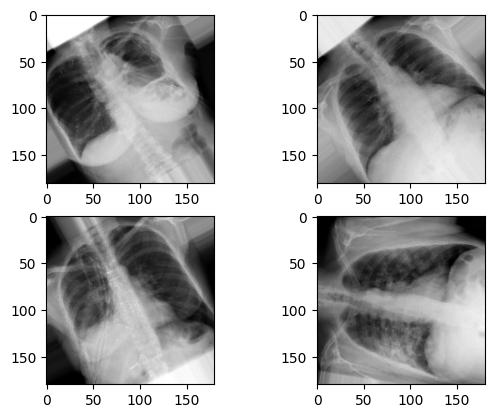

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

for i in range(4):

	# Define una subtrama
	pyplot.subplot(2, 2, i+1)

	# Genera el lote de imágenes
	batch = training_augmented_images.next()

	# Convierte a enteros sin signo para visualizarlos
	image = batch[0][0].astype('uint8')

	# Traza los datos de pixeles sin procesar
	pyplot.imshow(image)

# Trazar la imagen principal (con 4 subimágenes)
pyplot.show()


In [ ]:
#data augmentation aleatorio(cambio de tamaño,rotación,giro,zoom,etc)
training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

#directorio del origen de imagen
training_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/training_dataset"

#Generar datos procesados
training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,target_size=(100,100)
)


Found 200 images belonging to 2 classes.


In [ ]:
#Tomaremos el cambio de tamaño con el aprendizaje aleatorio de datos
validation_data_generator = ImageDataGenerator(rescale=1.0/255)
#Directorio de origen
validation_image_directory = "/content/PRO-M3-Pneumothorax-Image-Dataset/validation_dataset"
#Generar el aprendizaje o aumento de datos procesados
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,target_size=(180,180)
)

Found 200 images belonging to 2 classes.


In [ ]:
#Aprendizaje en secuencia con KERAS
import tensorflow as tf
model = tf.keras.models.Sequential([
    #1a capa de convolución y pooling(agrupacion)
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(180,180,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #2a capa de convolución y pooling(agrupacion)
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #3a capa de convolución y pooling(agrupacion)
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #4a capa de convolución y pooling(agrupacion)
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),

    #Agrupar los resulados para ingresarlos a la capa densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #Capa de clasificacion
    tf.keras.layers.Dense(152,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 20, 20, 128)      